## Data preparation and EDA

In this section i clean and prepare the dataset for the model which involves the following steps:

- Download the data from the given link.
- Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.
- Replace the maximum value of income, assests, and debt columns with NaNs.
- Replace the NaNs in the dataframe with 0 (will be shown in the next lesson).
- Extract only those rows in the column status who are either ok or default as value.
- Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.
- Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.
- Finally delete the target variable from the train/val/test dataframe.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv("/Users/victoroshimua/Machine-learning-zoomcamp-/DATA/credit_risk.csv")

In [3]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
data.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [5]:
data.columns=data.columns.str.lower()

In [6]:
data.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [7]:
data["status"]=data.status.map({1:"ok",2:"default",0:"unk"})
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

data.home = data.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

data.marital = data.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

data.records = data.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

data.job = data.job.map(job_values)


In [9]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
### according to the data description from where i downloaded it, 999999999 represents a mising value
## To make it show.
for c in ["income","assets","debt"]:
    data[c] = data[c].replace(99999999,np.nan)


In [12]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
data.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [14]:
data.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [15]:
data=data[data.status != "unk"].reset_index(drop=True)

In [16]:
data.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data["status"]=(data["status"]=="default").astype(int)
data["status"]

0       0
1       0
2       1
3       0
4       0
       ..
4449    1
4450    0
4451    1
4452    0
4453    0
Name: status, Length: 4454, dtype: int64

In [19]:
data_full_train,data_test = train_test_split(data,test_size=0.2,random_state=11)
data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=11)
len(data_train), len(data_val),len(data_test)

(2672, 891, 891)

In [20]:
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)

In [21]:
data_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,0,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,0,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,0,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,0,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,0,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [22]:
Y_train=data_train["status"].values
Y_test=data_test["status"].values
Y_val=data_val["status"].values

In [23]:
len(Y_test),len(Y_val)

(891, 891)

In [24]:
del data_train["status"]
del data_test["status"]
del data_val["status"]

In [25]:
data_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision trees

In [26]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
# decision trees in without Scikit learn

In [27]:
dt=data_train.iloc[0].to_dict()
assess_risk(dt)

'ok'

In [28]:
for i in range(2672):
    dt = data_train.iloc[i].to_dict()
    risk_level = assess_risk(dt)
    print("Risk level for client", i+1, ":", risk_level)


Risk level for client 1 : ok
Risk level for client 2 : ok
Risk level for client 3 : default
Risk level for client 4 : default
Risk level for client 5 : default
Risk level for client 6 : ok
Risk level for client 7 : default
Risk level for client 8 : default
Risk level for client 9 : default
Risk level for client 10 : default
Risk level for client 11 : ok
Risk level for client 12 : default
Risk level for client 13 : default
Risk level for client 14 : default
Risk level for client 15 : default
Risk level for client 16 : default
Risk level for client 17 : default
Risk level for client 18 : default
Risk level for client 19 : default
Risk level for client 20 : default
Risk level for client 21 : default
Risk level for client 22 : default
Risk level for client 23 : default
Risk level for client 24 : default
Risk level for client 25 : ok
Risk level for client 26 : default
Risk level for client 27 : default
Risk level for client 28 : default
Risk level for client 29 : ok
Risk level for client 30

Risk level for client 335 : default
Risk level for client 336 : ok
Risk level for client 337 : default
Risk level for client 338 : ok
Risk level for client 339 : ok
Risk level for client 340 : default
Risk level for client 341 : ok
Risk level for client 342 : default
Risk level for client 343 : default
Risk level for client 344 : ok
Risk level for client 345 : default
Risk level for client 346 : default
Risk level for client 347 : ok
Risk level for client 348 : default
Risk level for client 349 : default
Risk level for client 350 : default
Risk level for client 351 : default
Risk level for client 352 : ok
Risk level for client 353 : default
Risk level for client 354 : default
Risk level for client 355 : default
Risk level for client 356 : ok
Risk level for client 357 : ok
Risk level for client 358 : default
Risk level for client 359 : ok
Risk level for client 360 : ok
Risk level for client 361 : ok
Risk level for client 362 : ok
Risk level for client 363 : ok
Risk level for client 364 

Risk level for client 699 : default
Risk level for client 700 : default
Risk level for client 701 : default
Risk level for client 702 : default
Risk level for client 703 : ok
Risk level for client 704 : default
Risk level for client 705 : ok
Risk level for client 706 : default
Risk level for client 707 : ok
Risk level for client 708 : default
Risk level for client 709 : default
Risk level for client 710 : default
Risk level for client 711 : default
Risk level for client 712 : default
Risk level for client 713 : default
Risk level for client 714 : default
Risk level for client 715 : ok
Risk level for client 716 : default
Risk level for client 717 : ok
Risk level for client 718 : default
Risk level for client 719 : default
Risk level for client 720 : default
Risk level for client 721 : default
Risk level for client 722 : default
Risk level for client 723 : default
Risk level for client 724 : default
Risk level for client 725 : default
Risk level for client 726 : default
Risk level for cl

Risk level for client 1026 : default
Risk level for client 1027 : ok
Risk level for client 1028 : default
Risk level for client 1029 : default
Risk level for client 1030 : default
Risk level for client 1031 : default
Risk level for client 1032 : default
Risk level for client 1033 : default
Risk level for client 1034 : default
Risk level for client 1035 : default
Risk level for client 1036 : ok
Risk level for client 1037 : ok
Risk level for client 1038 : default
Risk level for client 1039 : ok
Risk level for client 1040 : default
Risk level for client 1041 : default
Risk level for client 1042 : default
Risk level for client 1043 : ok
Risk level for client 1044 : ok
Risk level for client 1045 : default
Risk level for client 1046 : default
Risk level for client 1047 : default
Risk level for client 1048 : default
Risk level for client 1049 : default
Risk level for client 1050 : default
Risk level for client 1051 : ok
Risk level for client 1052 : ok
Risk level for client 1053 : default
Risk

Risk level for client 1383 : ok
Risk level for client 1384 : default
Risk level for client 1385 : ok
Risk level for client 1386 : default
Risk level for client 1387 : default
Risk level for client 1388 : ok
Risk level for client 1389 : ok
Risk level for client 1390 : ok
Risk level for client 1391 : ok
Risk level for client 1392 : default
Risk level for client 1393 : default
Risk level for client 1394 : default
Risk level for client 1395 : ok
Risk level for client 1396 : default
Risk level for client 1397 : default
Risk level for client 1398 : ok
Risk level for client 1399 : default
Risk level for client 1400 : ok
Risk level for client 1401 : default
Risk level for client 1402 : ok
Risk level for client 1403 : default
Risk level for client 1404 : default
Risk level for client 1405 : ok
Risk level for client 1406 : default
Risk level for client 1407 : ok
Risk level for client 1408 : ok
Risk level for client 1409 : default
Risk level for client 1410 : ok
Risk level for client 1411 : defau

Risk level for client 1726 : default
Risk level for client 1727 : default
Risk level for client 1728 : default
Risk level for client 1729 : default
Risk level for client 1730 : ok
Risk level for client 1731 : default
Risk level for client 1732 : default
Risk level for client 1733 : ok
Risk level for client 1734 : default
Risk level for client 1735 : ok
Risk level for client 1736 : default
Risk level for client 1737 : default
Risk level for client 1738 : default
Risk level for client 1739 : ok
Risk level for client 1740 : default
Risk level for client 1741 : default
Risk level for client 1742 : ok
Risk level for client 1743 : default
Risk level for client 1744 : ok
Risk level for client 1745 : ok
Risk level for client 1746 : default
Risk level for client 1747 : default
Risk level for client 1748 : ok
Risk level for client 1749 : ok
Risk level for client 1750 : ok
Risk level for client 1751 : default
Risk level for client 1752 : default
Risk level for client 1753 : default
Risk level for

Risk level for client 2098 : ok
Risk level for client 2099 : default
Risk level for client 2100 : default
Risk level for client 2101 : default
Risk level for client 2102 : default
Risk level for client 2103 : default
Risk level for client 2104 : ok
Risk level for client 2105 : default
Risk level for client 2106 : default
Risk level for client 2107 : ok
Risk level for client 2108 : default
Risk level for client 2109 : ok
Risk level for client 2110 : ok
Risk level for client 2111 : ok
Risk level for client 2112 : default
Risk level for client 2113 : default
Risk level for client 2114 : default
Risk level for client 2115 : default
Risk level for client 2116 : default
Risk level for client 2117 : ok
Risk level for client 2118 : default
Risk level for client 2119 : default
Risk level for client 2120 : default
Risk level for client 2121 : ok
Risk level for client 2122 : ok
Risk level for client 2123 : ok
Risk level for client 2124 : ok
Risk level for client 2125 : ok
Risk level for client 21

Risk level for client 2423 : ok
Risk level for client 2424 : default
Risk level for client 2425 : default
Risk level for client 2426 : ok
Risk level for client 2427 : ok
Risk level for client 2428 : default
Risk level for client 2429 : default
Risk level for client 2430 : ok
Risk level for client 2431 : ok
Risk level for client 2432 : default
Risk level for client 2433 : default
Risk level for client 2434 : default
Risk level for client 2435 : ok
Risk level for client 2436 : ok
Risk level for client 2437 : default
Risk level for client 2438 : default
Risk level for client 2439 : default
Risk level for client 2440 : default
Risk level for client 2441 : ok
Risk level for client 2442 : default
Risk level for client 2443 : ok
Risk level for client 2444 : default
Risk level for client 2445 : default
Risk level for client 2446 : default
Risk level for client 2447 : ok
Risk level for client 2448 : default
Risk level for client 2449 : default
Risk level for client 2450 : ok
Risk level for clie

In [29]:
#decision tree with scikit learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [30]:
train_dicts=data_train.fillna(0).to_dict(orient="records")
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train=dv.transform(train_dicts)


In [31]:

dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [32]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
val_dicts=data_val.fillna(0).to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [34]:
y_pred=dt.predict_proba(X_val)[:,1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
roc_auc_score(Y_val,y_pred)
#low score here 

0.6524999394541183

In [36]:
## checking for roc_auc_score of the train data
pred_1= dt.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

1.0

## The model did learn well on the train data but failed to predict well on unseen data this is (OVERFITTING)

In [37]:
## To solve overfiting in decision trees, i have to change the number of trees or train a decision stump

In [38]:
dtm=DecisionTreeClassifier(max_depth=3)
dtm.fit(X_train,Y_train)
y_pred=dtm.predict_proba(X_val)[:,1]
y_pred

array([0.11690761, 0.11690761, 0.26356589, 0.11690761, 0.11690761,
       0.3875969 , 0.11690761, 0.76811594, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.26356589,
       0.60294118, 0.11690761, 0.60829493, 0.11690761, 0.11690761,
       0.11690761, 0.3875969 , 0.11690761, 0.3875969 , 0.60829493,
       0.48387097, 0.60829493, 0.11690761, 0.60829493, 0.11690761,
       0.48387097, 0.11690761, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.60829493, 0.60829493, 0.76811594,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.3875969 ,
       0.11690761, 0.11690761, 0.3875969 , 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.26356589, 0.26356589, 0.11690761,
       0.3875969 , 0.26356589, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.11690

In [39]:
roc_auc_score(Y_val,y_pred)

0.7389079944782155

In [40]:
pred_1= dtm.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

0.7761016984958594

In [41]:
### here the model is better and does not over fit after changing the number of dept

In [42]:
print(export_text(dt, feature_names=dv.get_feature_names()))
### Decision trees with plenty layers

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |   |   |--- seniority <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- seniority >  0.50
|   |   |   |   |   |   |   |   |--- price <= 1457.50
|   |   |   |   |   |   |   |   |   |--- expenses <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- home=other <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- home=other >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- expenses >  55.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- price >  1457.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- h

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
##decision tree with only three layers
print(export_text(dtm, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



### Decision trees parameter tuning

* selecting max_depth = numbers of rules 
* selecting min_samples_leaf = numbers of samples in each leaf nodes
###### These are the two best parameters for a Decision tree 

###### selecting max_depth that brings higher accuracy

In [44]:
for d in [1,2,3,4,5,6,7,10,15,20,None,100]:# setting figures for max_depth(none means any of number dept)
    dtc=DecisionTreeClassifier(max_depth=d)
    dtc.fit(X_train,Y_train)
    
    y_pred=dtc.predict_proba(X_val)[:,1]
    auc=roc_auc_score(Y_val,y_pred)
    
    print("For Max_dept {d}, auc_score = {a}".format(d=d,a=auc) )


For Max_dept 1, auc_score = 0.6058644740984719
For Max_dept 2, auc_score = 0.6685264343319367
For Max_dept 3, auc_score = 0.7389079944782155
For Max_dept 4, auc_score = 0.7612827250490422
For Max_dept 5, auc_score = 0.7669377103969388
For Max_dept 6, auc_score = 0.7487012908381971
For Max_dept 7, auc_score = 0.7430523600784674
For Max_dept 10, auc_score = 0.6808081664285195
For Max_dept 15, auc_score = 0.6648694630791213
For Max_dept 20, auc_score = 0.6416622266353442
For Max_dept None, auc_score = 0.6651419195466324
For Max_dept 100, auc_score = 0.6453343343585769


In [45]:
## from here i can see the best parameter for max_depth is between 4 to 6,but 5 is the highest

###### selecting min_sample_leaf and max_depth that brings higher accuracy

In [46]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, Y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)
        
        scores.append((depth, s, auc))

In [47]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766496
9,5,5,0.767755


In [48]:
### to know the parameter with the higest accuracy using pivot tables
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.750
5                 0.761  0.768  0.763
10                0.761  0.762  0.778
15                0.764  0.772  0.786
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

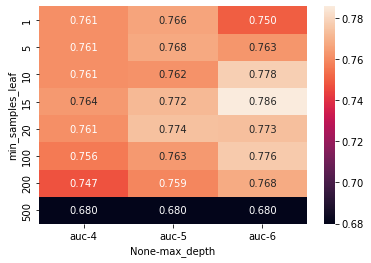

In [49]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [50]:
### from the pivot table it can be seen that the parameters with the highest roc_auc score is max_depth=6 and min_samples_leaf=15

In [51]:
# using the best parameters to tune the model
dt=DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train, Y_train)
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Ensemble and random forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier


In [53]:
rf=RandomForestClassifier(n_estimators=10)

In [54]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [55]:
y_pred=rf.predict_proba(X_val)[:,1]

In [56]:
score=roc_auc_score(Y_val,y_pred)

In [57]:
score

0.7806271342423288

#### Random forest parameter tuning
* max_depth	
* n_estimators
* min_sample_leafs

In [58]:
# using different extimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, Y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(Y_val, y_pred)
    
    scores.append((n, auc))

In [59]:
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


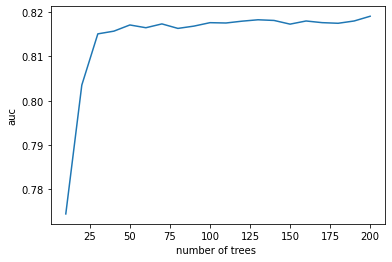

In [60]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of trees ")
plt.ylabel("auc")
plt.show()


In [61]:
### using different max depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((d, n, auc))
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [62]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


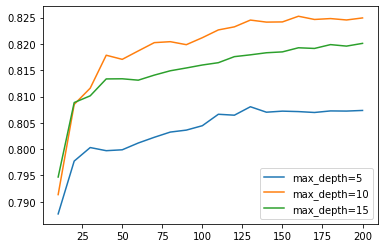

In [63]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [64]:
### best max dept
max_depth=10

In [65]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((s, n, auc))


In [66]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head(1)

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365


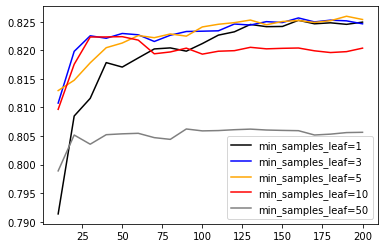

In [67]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [68]:
### best min_samples_leaf
min_samples_leaf = 3


In [69]:
###using the best parameters
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, Y_train)
RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:
* max_features
* bootstrap


### Gradient boosting and Xgboost

In [70]:
!pip install xgboost

In [71]:
import xgboost as xgb

In [72]:
features=dv.get_feature_names()
d_train=xgb.DMatrix(X_train,label=Y_train,feature_names=features)

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
d_val=xgb.DMatrix(X_val,label=Y_val,feature_names=features)

In [74]:
# to know more about the parameters check the xgboost documentation 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=10)


In [75]:
y_pred=model.predict(d_val)

In [76]:
roc_auc_score(Y_val,y_pred)

0.8152745150274878

In [77]:
%%capture output

UsageError: %%capture is a cell magic, but the cell body is empty.


In [ ]:
watchlist = [(d_train, 'train'), (d_val, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
s = output.stdout
print(s[:200])

###### could not continue because my jupyter notebook fails to run the capture magic funtion, i wil come bact to it later

### Selecting the final model
* After all the training i will select between decision tree,random forest or gradient boost based on thier roc score after using the best parameter tuning 
* Then train final model with the entire training dataset(df_full_train)
* save the model


In [ ]:
# best decision tree
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, Y_train)

In [ ]:
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,y_pred)

In [ ]:
## best random forest
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, Y_train)

In [ ]:
y_pred=rf.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,y_pred)

In [ ]:
## best Xgboost model
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=175)


In [ ]:
y_pred=model.predict(d_val)
roc_auc_score(Y_val,y_pred)

### from here i can see the best performing model is the Xgboost model

## Next i will train the full train dataset(data_full_train) with xgboost model(best model)

In [ ]:
data_full_train

In [ ]:
data_full_train = data_full_train.reset_index(drop=True)
y_full_train = (data_full_train.status == 'default').astype(int).values
del data_full_train['status']
## reset index and prepare the features and target

In [ ]:
dicts_full_train = data_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
## feature matrix(one hot encoding )

In [ ]:
dicts_test = data_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

In [ ]:
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())


In [ ]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}



In [ ]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)


In [ ]:
yy_pred = model.predict(dtest)
roc_auc_score(Y_test, yy_pred)

In [ ]:
# Save xgboost model
bentoml.xgboost.save_model('credit_risk_model',
                            model,
                            custom_objects={'DictVectorizer': dv})

In [78]:
dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [80]:
data_full_train.iloc[10]

status               0
seniority            7
home             owner
time                 6
age                 52
marital        married
records            yes
job          freelance
expenses            60
income             0.0
assets          9000.0
debt               0.0
amount             550
price             2136
Name: 2780, dtype: object

In [83]:
import json
request = data_test.iloc[0].to_dict()
print(json.dumps(request, indent=2))

{
  "seniority": 3,
  "home": "owner",
  "time": 36,
  "age": 26,
  "marital": "single",
  "records": "no",
  "job": "freelance",
  "expenses": 35,
  "income": 0.0,
  "assets": 60000.0,
  "debt": 3000.0,
  "amount": 800,
  "price": 1000
}


In [85]:
import json
reques = data_full_train.iloc[0].to_dict()
print(json.dumps(reques, indent=2))


{
  "status": 0,
  "seniority": 22,
  "home": "owner",
  "time": 48,
  "age": 48,
  "marital": "married",
  "records": "no",
  "job": "fixed",
  "expenses": 60,
  "income": 110.0,
  "assets": 3000.0,
  "debt": 0.0,
  "amount": 1000,
  "price": 1460
}
